In [480]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy import integrate
import time

In [722]:
# system_par
M = 2
K1 = 3
K2 = 2
#K2 = 0
m_ls = np.array([1,1.2,1.4,1.7])
#m_ls = np.array([1,1,1,1])
K_intra = np.array([1.7,1.7,1.7,1.7,1.4,1.4,1.4,1.4,1,1])
#K_intra = np.array([1.5,1.5,1.5,1.5,1.4,1.4,1.4,1.4,1,1])

# driving_par
freq_driving = 0.4
x_driving = 1
y_driving = 1

# initialize
sys_par, dr_par = initialize(M,m_ls,K1,K2,K_intra,freq_driving,x_driving,y_driving)


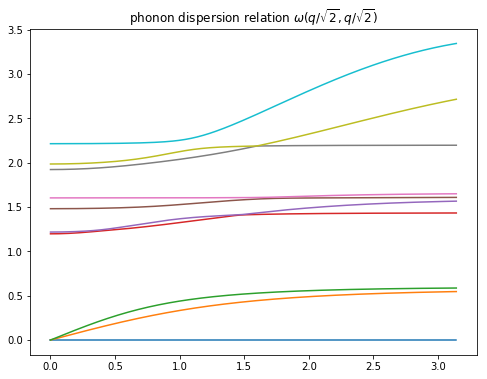

In [723]:
q = np.linspace(0,np.pi,200)

eV = []

for qx in q:
    
    f2 = Eig(qx/np.sqrt(2),qx/np.sqrt(2),sys_par)[0]
    eV.append(np.sqrt(np.sort(f2)+0.000001))


eV = np.array(eV).transpose()

fig, ax = plt.subplots(figsize = (8,6))

for i in range(10):
    plt.plot(q,eV[i],'-')

plt.title("phonon dispersion relation $\omega(q/\sqrt{2},q/\sqrt{2})$")

plt.show()


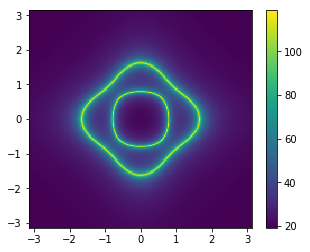

In [724]:
# Plots spectral 

q = np.linspace(-np.pi,np.pi,200)

w0 = freq_driving
eta = 0.01
eV = []

for qx in q:
    for qy in q:
        
        f2 = Eig(qx,qy,sys_par)[0]
        
        r = 0
        for i in f2:
            r += 1/(abs(i - w0**2) + eta)

        
        eV.append(r)



X, Y = np.meshgrid(q, q)


Z = np.array(eV).reshape(200, 200)

fig, ax = plt.subplots(figsize = (5,4))

plt.pcolor(q, q, Z)
plt.colorbar()
plt.show()


In [725]:

x_ls = range(0,25)
y_ls = []

#print(f(1,0,1,1,sys_par,dr_par,0.00))

for x in x_ls:
    print (x)
    y_ls.append(Int_velocity(0,x,sys_par,dr_par,0.01))

#plt.plot(x_ls,y_ls)

#x = np.linspace(0.3,0.5,1000)
#y=[]
#for i in x:
#    y.append(f(0,0,i/1.5,i/1.5,sys_par,dr_par,0.01)[0])

#plt.plot(x,y)
#M = sys_par[0] + Matrix_inter(1,1,sys_par)

#eV,Vec = Eig(1,1,sys_par)
#a = np.cos(1)/4/np.pi**2
#print(a)
#drV = np.array([1,0,0,0,0,1,0,0,0,0])
#b = np.array([a*sum((Vec*drV)[i])/(-1+eV[i]) for i in range(10)])
#print(np.dot(Vec.transpose(),b))



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


KeyboardInterrupt: 

[array([[-0.09726767, -0.16333568, -0.14259744, -0.16747228, -0.14255507,
        -0.09878705, -0.13923152, -0.15941205, -0.13903101, -0.16354804],
       [-0.12872267, -0.23358252, -0.20042189, -0.24014457, -0.20040749,
        -0.12802923, -0.19014864, -0.22127355, -0.18973824, -0.22783591]]), array([[ 0.15605738,  0.28412619,  0.24220637,  0.29012102,  0.24375517,
         0.06718535,  0.10535188,  0.1224518 ,  0.10352941,  0.12844664],
       [-0.11659055, -0.19470144, -0.17148439, -0.20145295, -0.17000012,
        -0.18527381, -0.26685918, -0.30956641, -0.26780731, -0.3162927 ]]), array([[ 0.07358438,  0.12134087,  0.1077882 ,  0.12636945,  0.10618515,
         0.14189361,  0.2084238 ,  0.24390643,  0.2095885 ,  0.24893508],
       [ 0.11500148,  0.21006995,  0.17701178,  0.21173803,  0.1803116 ,
        -0.06537554, -0.08860654, -0.10459228, -0.09176568, -0.10292417]]), array([[-0.06860718, -0.12541052, -0.10407207, -0.12410777, -0.10781539,
         0.12694782,  0.18273912,  0.2

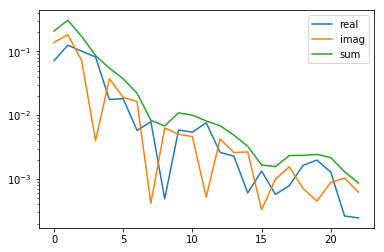

In [728]:
print(y_ls)

#x_0 = [y_ls[j][1][0] for j in range(len(y_ls))]


#pot1_ls = [pot_E([j[0],[0,0,0,0,0,0,0,0,0,0]],sys_par) for j in y_ls]
#pot2_ls = [pot_E([j[1],[0,0,0,0,0,0,0,0,0,0]],sys_par) for j in y_ls]
#potsum_ls = [pot1_ls[i]+pot2_ls[i] for i in range(len(pot1_ls))]
#pot_ls = [pot_E(j,sys_par) for j in y_ls]

#pot1_ls[6]=0
#pot2_ls[6]=0
kin1_ls = [k_E([j[0],[0,0,0,0,0,0,0,0,0,0]],sys_par) for j in y_ls]
kin2_ls = [k_E([[0,0,0,0,0,0,0,0,0,0],j[1]],sys_par) for j in y_ls]
#kinsum_ls = [kin1_ls[i]+kin2_ls[i] for i in range(len(pot1_ls))]
kin_ls = [k_E(j,sys_par) for j in y_ls]

#plt.plot(pot1_ls[0:-1],'-',  label = 'real')
#plt.plot(pot2_ls[0:-1],'o-', label = 'imag')
#plt.plot(pot_ls[0:-1],'o--', label = 'total')

plt.plot(kin1_ls[0:-1],'-',label='real')
plt.plot(kin2_ls[0:-1],'-',label='imag')
plt.plot(kin_ls[0:-1],'-',label='sum')
plt.legend()

#plt.title('Potential energy')
#plt.title('kinetic energy')
plt.yscale('log')
#plt.xscale('log')


plt.show()

In [660]:
def initialize(M, m_ls, K1, K2, K_intra, freq_driving, x_driving, y_driving):
    M_intra = Matrix_intra(M,m_ls,K_intra)

    return ([M_intra, M, K1, K2, K_intra, m_ls],[freq_driving, x_driving, y_driving])

def Int_displacement(rx, ry, sys_par, dr_par, epsilon):
    real = []
    imag = []
    for i in range(10):
        
        real.append(2*integrate.dblquad(lambda qx,qy:dx(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][0], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])
        imag.append(2*integrate.dblquad(lambda qx,qy:dx(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][1], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])

    return np.array([real,imag])

def Int_velocity(rx, ry, sys_par, dr_par, epsilon):
    real = []
    imag = []
    for i in range(10):
        
        real.append(2*integrate.dblquad(lambda qx,qy:v(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][0], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])
        imag.append(2*integrate.dblquad(lambda qx,qy:v(rx,ry,qx,qy,sys_par,dr_par,epsilon)[i][1], 0, np.pi, lambda qy: -np.pi, lambda qy: np.pi,epsrel = 0.01)[0])

    return np.array([real,imag])

def dx(rx, ry, qx, qy, sys_par, dr_par, epsilon):

    w_0, x_dr, y_dr = dr_par

    prefactor = np.exp(1j*(qx*rx+qy*ry))/(2*np.pi)**2

    eigVal, eigVec = Eig(qx,qy,sys_par)

    C = np.zeros(10, dtype = complex)

    for a in range(10):
        C[a] = (eigVec[a][0]*x_dr+eigVec[a][5]*y_dr)/(-(w_0+ 1j*epsilon)**2 + eigVal[a] )
    result = prefactor*np.dot(eigVec.transpose(),C)
    
    return np.array([np.real(result), np.imag(result)]).transpose()

def v(rx, ry, qx, qy, sys_par, dr_par, epsilon):

    w_0, x_dr, y_dr = dr_par

    prefactor = -(w_0+ 1j*epsilon)*np.exp(1j*(qx*rx+qy*ry))/(2*np.pi)**2

    eigVal, eigVec = Eig(qx,qy,sys_par)

    C = np.zeros(10, dtype = complex)

    for a in range(10):
        C[a] = (eigVec[a][0]*x_dr+eigVec[a][5]*y_dr)/(-(w_0+ 1j*epsilon)**2 + eigVal[a] )
    result = prefactor*np.dot(eigVec.transpose(),C)
    
    return np.array([np.real(result), np.imag(result)]).transpose()
    

def pot_E(displacement,sys_par):

    K_intra = sys_par[4]

    V = 0
    
    for i in range(2):
        
        pos = displacement[i]
        
        V += K_intra[0] * (pos[5]-pos[6])**2
        V += K_intra[1] * (pos[0]-pos[2])**2
        V += K_intra[2] * (pos[5]-pos[8])**2
        V += K_intra[3] * (pos[0]-pos[4])**2
        V += K_intra[4] * (pos[1]-pos[2]-(pos[6]-pos[7]))**2 / 2
        V += K_intra[5] * (pos[2]-pos[3]+(pos[7]-pos[8]))**2 / 2
        V += K_intra[6] * (pos[3]-pos[4]-(pos[8]-pos[9]))**2 / 2
        V += K_intra[7] * (pos[4]-pos[1]+(pos[9]-pos[6]))**2 / 2
        V += K_intra[8] * (pos[6]-pos[8])**2
        V += K_intra[9] * (pos[2]-pos[4])**2

    return V/4
    
def k_E(velocity,sys_par):


    M = sys_par[1]
    m_ls = sys_par[5]
    K = 0
    
    for i in range(2):
        vel = velocity[i]
        K+= M * (vel[0]**2 + vel[5]**2)
        K+= m_ls[0] * (vel[1]**2 + vel[6]**2)
        K+= m_ls[1] * (vel[2]**2 + vel[7]**2)
        K+= m_ls[2] * (vel[3]**2 + vel[6]**2)
        K+= m_ls[3] * (vel[4]**2 + vel[9]**2)

    return K/4

def Eig(qx,qy,sys_par):
    M_intra = sys_par[0]
    M_inter = Matrix_inter(qx,qy,sys_par)
    eigVal, eigVec = np.linalg.eigh((M_intra+M_intra.transpose()+M_inter+M_inter.transpose())/2)
    return -eigVal, eigVec.transpose()



def rescale_K(M,m,K):
    factors = np.array([np.sqrt(M*m[0]),np.sqrt(M*m[1]),np.sqrt(M*m[2]),np.sqrt(M*m[3]),np.sqrt(m[0]*m[1]),np.sqrt(m[1]*m[2]),np.sqrt(m[2]*m[3]),np.sqrt(m[3]*m[0]),np.sqrt(m[0]*m[2]),np.sqrt(m[1]*m[3])])
    return K/factors


def Matrix_inter(qx,qy,sys_par):
    
    M  = sys_par[1]
    K1 = sys_par[2]
    K2 = sys_par[3]
    
    K1=K1/M
    K2=K2/M
    
    diag_x  = -4*K1*(np.sin(qx/2)**2)-2*K2*(np.sin((qx+qy)/np.sqrt(8))**2+np.sin((qx-qy)/np.sqrt(8))**2)
    diag_y  = -4*K1*(np.sin(qy/2)**2)-2*K2*(np.sin((qx+qy)/np.sqrt(8))**2+np.sin((qx-qy)/np.sqrt(8))**2)
    off_d = -2*K2*(np.sin((qx+qy)/np.sqrt(8))**2-np.sin((qx-qy)/np.sqrt(8))**2)
    
    res = np.zeros([10,10])
    
    res[0][0] = diag_x
    res[5][5] = diag_y
    res[0][5] = off_d
    res[5][0] = off_d
    
    return res
    
    

def Matrix_intra(M,m,K_intra):
    
    K = rescale_K(M,m,K_intra)
    
    res = np.zeros([10,10])
    #spring 1
    res[5][5]-=K[0]
    res[5][6]+=K[0]
    res[6][6]-=K[0]
    res[6][5]+=K[0]
    #spring 2
    res[0][0]-=K[1]
    res[0][2]+=K[1]
    res[2][2]-=K[1]
    res[2][0]+=K[1]
    #spring 3
    res[5][5]-=K[2]
    res[5][8]+=K[2]
    res[8][8]-=K[2]
    res[8][5]+=K[2]
    #spring 4
    res[0][0]-=K[3]
    res[0][4]+=K[3]
    res[4][4]-=K[3]
    res[4][0]+=K[3]
    #spring 5
    res[1][1]-=K[4]/2
    res[1][2]+=K[4]/2
    res[1][6]+=K[4]/2
    res[1][7]-=K[4]/2
    res[6][1]+=K[4]/2
    res[6][2]-=K[4]/2
    res[6][6]-=K[4]/2
    res[6][7]+=K[4]/2

    res[2][2]-=K[4]/2
    res[2][1]+=K[4]/2
    res[2][7]+=K[4]/2
    res[2][6]-=K[4]/2
    res[7][2]+=K[4]/2
    res[7][1]-=K[4]/2
    res[7][7]-=K[4]/2
    res[7][6]+=K[4]/2

    #spring 6
    res[2][2]-=K[5]/2
    res[2][3]+=K[5]/2
    res[2][7]-=K[5]/2
    res[2][8]+=K[5]/2
    res[7][2]-=K[5]/2
    res[7][3]+=K[5]/2
    res[7][7]-=K[5]/2
    res[7][8]+=K[5]/2

    res[3][3]-=K[5]/2
    res[3][2]+=K[5]/2
    res[3][8]-=K[5]/2
    res[3][7]+=K[5]/2
    res[8][3]-=K[5]/2
    res[8][2]+=K[5]/2
    res[8][8]-=K[5]/2
    res[8][7]+=K[5]/2

    #spring 7
    res[3][3]-=K[6]/2
    res[3][4]+=K[6]/2
    res[3][8]+=K[6]/2
    res[3][9]-=K[6]/2
    res[8][3]+=K[6]/2
    res[8][4]-=K[6]/2
    res[8][8]-=K[6]/2
    res[8][9]+=K[6]/2

    res[4][4]-=K[6]/2
    res[4][3]+=K[6]/2
    res[4][9]+=K[6]/2
    res[4][8]-=K[6]/2
    res[9][4]+=K[6]/2
    res[9][3]-=K[6]/2
    res[9][9]-=K[6]/2
    res[9][8]+=K[6]/2
    
    #spring 8
    res[4][4]-=K[7]/2
    res[4][1]+=K[7]/2
    res[4][9]-=K[7]/2
    res[4][6]+=K[7]/2
    res[9][4]-=K[7]/2
    res[9][1]+=K[7]/2
    res[9][9]-=K[7]/2
    res[9][6]+=K[7]/2

    res[1][1]-=K[7]/2
    res[1][4]+=K[7]/2
    res[1][6]-=K[7]/2
    res[1][9]+=K[7]/2
    res[6][1]-=K[7]/2
    res[6][4]+=K[7]/2
    res[6][6]-=K[7]/2
    res[6][9]+=K[7]/2
    
    #spring 9
    res[6][6]-=K[8]
    res[6][8]+=K[8]
    res[8][8]-=K[8]
    res[8][6]+=K[8]
    
    #spring 10
    res[2][2]-=K[9]
    res[2][4]+=K[9]
    res[4][4]-=K[9]
    res[4][2]+=K[9]
    
    return res



In [561]:
y_ls=[array([[-0.0772252 , -0.08607135, -0.08337966, -0.08658022, -0.08338412,
        -0.0773294 , -0.08290674, -0.08556972, -0.08289523, -0.08608638],
       [-0.06114608, -0.06991663, -0.0672472 , -0.07042371, -0.06725131,
        -0.06115479, -0.06667045, -0.06930856, -0.06665766, -0.06981564]]), array([[ 0.02247447,  0.02682358,  0.02549848,  0.02707941,  0.0255008 ,
         0.02229135,  0.02500647,  0.02630852,  0.02499903,  0.02656102],
       [-0.10866552, -0.12198869, -0.11795151, -0.12276435, -0.11795807,
        -0.10874356, -0.11717609, -0.12119165, -0.11715805, -0.12196041]]), array([[ 0.06543966,  0.07429799,  0.07160303,  0.074809  ,  0.07160769,
         0.06530827,  0.07087303,  0.07353225,  0.07086006,  0.07404325],
       [-0.04506315, -0.04980636, -0.04836844, -0.05007944, -0.04837026,
        -0.04533646, -0.04835293, -0.04979038, -0.04834767, -0.05006344]]), array([[ 0.06881995,  0.07759137,  0.07492507,  0.07809739,  0.07492921,
         0.06888388,  0.07441417,  0.07705558,  0.0744022 ,  0.0775616 ],
       [-0.00868644, -0.00881005, -0.00877666, -0.00881712, -0.0087759 ,
        -0.00905548, -0.00916944, -0.00922115, -0.00917084, -0.00922822]]), array([[0.04626247, 0.05161526, 0.04999059, 0.05192434, 0.04999243,
        0.04656811, 0.04996882, 0.05159198, 0.04996257, 0.05190106],
       [0.03277148, 0.03754115, 0.03608847, 0.03781594, 0.03609154,
        0.0324691 , 0.03544607, 0.03686916, 0.03543832, 0.03714396]]), array([[0.01335436, 0.01452275, 0.01417056, 0.01459109, 0.01416989,
        0.01381118, 0.01458751, 0.01495781, 0.01458745, 0.01502615],
       [0.03621768, 0.04095739, 0.03951604, 0.04123066, 0.03951845,
        0.03615227, 0.03913402, 0.04055843, 0.03912728, 0.04083177]]), array([[-0.01340134, -0.01549962, -0.01485938, -0.01561965, -0.01486153,
        -0.01298312, -0.01427004, -0.01488473, -0.0142658 , -0.01500476],
       [ 0.02939349,  0.03289879,  0.03183472,  0.03310155,  0.03183573,
         0.02962214,  0.03185249,  0.03291766,  0.03184848,  0.03312042]]), array([[-0.02340058, -0.02637305, -0.02547037, -0.02654387, -0.0254723 ,
        -0.02321422, -0.02507475, -0.0259627 , -0.02507023, -0.02613352],
       [ 0.0022158 ,  0.00216443,  0.0021824 ,  0.00216274,  0.00218106,
         0.0026577 ,  0.00266447,  0.00266814,  0.00266601,  0.00266644]]), array([[-0.01621002, -0.01804517, -0.01748854, -0.01815133, -0.01748897,
        -0.01634461, -0.01751569, -0.01807498, -0.01751376, -0.01818114],
       [-0.01435741, -0.01578289, -0.01577064, -0.01589525, -0.01577296,
        -0.01390074, -0.01514429, -0.01573728, -0.01514011, -0.01585311]]), array([[ 0.00110506,  0.00160965,  0.00145392,  0.00163766,  0.00145536,
         0.00070956,  0.00099089,  0.00112511,  0.00098881,  0.00115312],
       [-0.0259531 , -0.02919986, -0.02821243, -0.02938612, -0.02821475,
        -0.02569426, -0.02772171, -0.02868871, -0.02771662, -0.02887497]]), array([[ 0.01740487,  0.01983634,  0.0190952 ,  0.01997507,  0.01909778,
         0.01693574,  0.01842832,  0.01848647,  0.01842352,  0.01862178],
       [-0.01729162, -0.01921948, -0.01863447, -0.01933068, -0.01863518,
        -0.01735467, -0.01857985, -0.01916426, -0.01857763, -0.01927546]]), array([[ 0.02466526,  0.02784425,  0.02687694,  0.02802651,  0.02687939,
         0.02434893,  0.02632672,  0.0272709 ,  0.02632149,  0.02745308],
       [-0.0055795 , -0.00593441, -0.00582908, -0.00595546, -0.00582817,
        -0.00593546, -0.00619183, -0.00631429, -0.00619261, -0.00633565]]), array([[0.02016531, 0.02254192, 0.02182015, 0.02267877, 0.02182129,
        0.02015003, 0.0216507 , 0.02236672, 0.0216476 , 0.02250358],
       [0.01122221, 0.01291704, 0.01239964, 0.01301328, 0.0124019 ,
        0.01073888, 0.01176552, 0.01225501, 0.01176167, 0.01235126]]), array([[0.00812987, 0.0089266 , 0.00868612, 0.00897346, 0.00868557,
        0.008425  , 0.00895512, 0.00920862, 0.00895507, 0.00925548],
       [0.01596022, 0.01808111, 0.0174351 , 0.01820217, 0.01743722,
        0.01557576, 0.0168825 , 0.01750541, 0.01687839, 0.01762647]]), array([[-0.00456492, -0.00535301, -0.00511141, -0.00539692, -0.00511321,
        -0.00409448, -0.00455093, -0.00476788, -0.00454838, -0.00481179],
       [ 0.01518808,  0.01703269,  0.01647193,  0.01713867,  0.01647308,
         0.01507409,  0.01623129,  0.01678332,  0.01622859,  0.01688932]]), array([[-0.01116773, -0.01262036, -0.01217752, -0.0127024 , -0.01217948,
        -0.01073852, -0.01162059, -0.01204042, -0.01161743, -0.01212267],
       [ 0.00343811,  0.00371279,  0.00363053,  0.00372933,  0.00362995,
         0.00363987,  0.00383372,  0.0039266 ,  0.00383411,  0.00394314]]), array([[-0.00949201, -0.01060846, -0.0102689 , -0.0106721 , -0.01026996,
        -0.0092911 , -0.00998238, -0.01031153, -0.00998045, -0.01037515],
       [-0.00546978, -0.00629161, -0.00604011, -0.00633751, -0.00604182,
        -0.00505453, -0.00553633, -0.00576522, -0.00553391, -0.00581112]]), array([[-0.00139986, -0.0013908 , -0.00139459, -0.00139059, -0.00139416,
        -0.00150314, -0.00151079, -0.00151428, -0.00151133, -0.00151406],
       [-0.01314072, -0.01481279, -0.01430332, -0.01490758, -0.01430545,
        -0.01270871, -0.01372815, -0.01421333, -0.01372466, -0.01430812]]), array([[ 0.00773867,  0.00885654,  0.00851525,  0.00891976,  0.00851691,
         0.00739438,  0.00806676,  0.00838734,  0.00806409,  0.00845056],
       [-0.01028073, -0.0114649 , -0.01110484, -0.01153215, -0.01110613,
        -0.01002703, -0.01075611, -0.01110252, -0.01075394, -0.01116976]]), array([[ 0.01317983,  0.01490631,  0.01438017,  0.01500434,  0.01438228,
         0.01276621,  0.0138203 ,  0.01432227,  0.01381673,  0.01442031],
       [-0.00492161, -0.00535476, -0.00522391, -0.00537973, -0.00522397,
        -0.00494861, -0.00522846, -0.00536128, -0.00522817, -0.00538624]]), array([[0.01227766, 0.01375528, 0.0133058 , 0.01383932, 0.01330736,
        0.01198727, 0.0128978 , 0.01333102, 0.01289507, 0.01341509],
       [0.00473372, 0.00550207, 0.00526696, 0.0055454 , 0.00526826,
        0.00445226, 0.00490981, 0.00512775, 0.00490777, 0.00517108]]), array([[0.00643508, 0.0071249 , 0.00691562, 0.00716448, 0.006916  ,
        0.00639272, 0.00682807, 0.00703546, 0.00682719, 0.00707505],
       [0.00846256, 0.00961725, 0.00926494, 0.00968243, 0.00926671,
        0.00806972, 0.00876477, 0.14084723, 0.00876203, 0.00916054]]), array([[-0.00095386, -0.00120754, -0.00112971, -0.00122141, -0.00113056,
        -0.00074212, -0.00088125, -0.00094726, -0.00088014, -0.00096113],
       [ 0.00948363,  0.01066254,  0.01030361,  0.01072933,  0.01030512,
         0.00915987,  0.00987886,  0.01022089,  0.00987641,  0.01028768]]), array([[-0.00571003, -0.00647547, -0.00624159, -0.00651825, -0.00624309,
        -0.00535213, -0.00580454, -0.00601929, -0.00580243, -0.00606207],
       [ 0.00335847,  0.00370116,  0.00359725,  0.00372047,  0.00359767,
         0.00324416,  0.0034542 ,  0.00355388,  0.00345357,  0.00357319]]), array([[-0.00589904, -0.00661527, -0.00639666, -0.00665529, -0.00639835,
        -0.00556011, -0.00598583, -0.00618774, -0.00598396, -0.00622776],
       [-0.001812  , -0.00212258, -0.00202734, -0.00213999, -0.00202798,
        -0.00168322, -0.00186522, -0.00195181, -0.00186428, -0.00196922]]), array([[-0.00182718, -0.00195422, -0.00191556, -0.00196086, -0.00191608,
        -0.00165261, -0.00172222, -0.00175449, -0.00172172, -0.00176113],
       [-0.00731913, -0.00826518, -0.00797676, -0.00831854, -0.0079782 ,
        -0.00702047, -0.00759065, -0.00786187, -0.00758845, -0.00791518]]), array([[ 0.00366314,  0.00421532,  0.00404693,  0.00424695,  0.00404745,
         0.00361399,  0.00395427,  0.00411609,  0.00395322,  0.00414772],
       [-0.00652122, -0.00728995, -0.00705558, -0.00733297, -0.00705696,
        -0.00619676, -0.00665599, -0.00687379, -0.00665408, -0.00691681]]), array([[ 0.00766504,  0.00868717,  0.00837559,  0.00874518,  0.00837687,
         0.00743303,  0.008056  ,  0.00835268,  0.00805384,  0.00841069],
       [-0.00414236, -0.00455563, -0.00442989, -0.0045786 , -0.00443068,
        -0.00393541, -0.00418211, -0.00429875, -0.00418111, -0.00432172]]), array([[0.00805524, 0.00904242, 0.00874163, 0.00909815, 0.00874304,
        0.0077598 , 0.00835814, 0.00864256, 0.00835598, 0.00869829],
       [0.00183557, 0.00217959, 0.00207459, 0.00219949, 0.00207481,
        0.00184561, 0.00205954, 0.00216204, 0.00205893, 0.00218194]]), array([[0.00516368, 0.00574907, 0.00557079, 0.00578194, 0.00557172,
        0.00494036, 0.00529332, 0.00546079, 0.00529198, 0.00549365],
       [0.00455212, 0.00519714, 0.00500027, 0.00523366, 0.00500126,
        0.00437836, 0.00476832, 0.00495402, 0.00476684, 0.00499055]]), array([[0.00068985, 0.00069004, 0.00069019, 0.00068982, 0.0006903 ,
        0.00063065, 0.00062918, 0.00062797, 0.00062915, 0.00062778],
       [0.00615746, 0.00694158, 0.00670245, 0.00698575, 0.00670368,
        0.00589109, 0.00636317, 0.00658754, 0.00636133, 0.00663171]]), array([[-0.00272389, -0.00310581, -0.00298905, -0.00312736, -0.00298967,
        -0.00260619, -0.00283535, -0.00294435, -0.0028344 , -0.0029659 ],
       [ 0.00283461,  0.00315302,  0.00305577,  0.00317048,  0.00305662,
         0.00259965,  0.00278288,  0.00286936,  0.00278185,  0.00288681]]), array([[-0.00357657, -0.00402477, -0.00388788, -0.00404969, -0.00388884,
        -0.00334742, -0.0036106 , -0.00373531, -0.00360932, -0.00376022],
       [-0.00012706, -0.00019314, -0.00017311, -0.00019733, -0.00017289,
        -0.00023394, -0.00028161, -0.00030488, -0.00028171, -0.00030907]]), array([[-0.00158918, -0.00173147, -0.00168779, -0.00173872, -0.00168857,
        -0.00135484, -0.00142684, -0.00146009, -0.00142605, -0.00146734],
       [-0.00411807, -0.00465812, -0.00449371, -0.00468847, -0.00449422,
        -0.00406305, -0.0043965 , -0.00455549, -0.00439552, -0.00458634]]), array([[ 0.00172118,  0.0019951 ,  0.00191198,  0.00201143,  0.00191173,
         0.00186319,  0.0020449 ,  0.00213236,  0.00204482,  0.00214869],
       [-0.00411445, -0.00460823, -0.00445781, -0.00463589, -0.00445866,
        -0.00393717, -0.00423271, -0.00437345, -0.00423151, -0.00440111]]), array([[ 0.00458231,  0.00520598,  0.00501659,  0.00524182,  0.00501697,
         0.0045849 ,  0.00497305,  0.00515917,  0.00497209,  0.005195  ],
       [-0.00328787, -0.00363713, -0.00353058, -0.00365636, -0.00353143,
        -0.00307483, -0.00327837, -0.00337446, -0.00327734, -0.00339368]]), array([[0.00538726, 0.00605766, 0.0058535 , 0.00609575, 0.00585427,
        0.00526378, 0.00567488, 0.00587057, 0.00567356, 0.00590866],
       [0.00049114, 0.00062831, 0.00058675, 0.00063686, 0.00058637,
        0.00064669, 0.0007437 , 0.00079092, 0.00074385, 0.00079947]]), array([[0.00404395, 0.00451974, 0.00437471, 0.0045464 , 0.00437553,
        0.00386163, 0.0041467 , 0.00428195, 0.00414555, 0.00430861],
       [0.00233546, 0.00268581, 0.00257917, 0.00270615, 0.00257928,
        0.00237553, 0.00259718, 0.00270335, 0.00259672, 0.00272369]]), array([[0.00134687, 0.00146232, 0.00142142, 0.00146625, 0.00142355,
        0.00118977, 0.00124991, 0.00127781, 0.00124938, 0.00128371],
       [0.00399306, 0.00451405, 0.00435536, 0.00454373, 0.00435592,
        0.0039131 , 0.00423331, 0.00438588, 0.00423231, 0.00441635]]), array([[-0.00103424, -0.00119476, -0.00114653, -0.00120424, -0.00114644,
        -0.0011032 , -0.00120892, -0.00125843, -0.00120882, -0.00126791],
       [ 0.00216866,  0.002427  ,  0.00234808,  0.00244125,  0.00234871,
         0.00201512,  0.00216516,  0.00223611,  0.00216437,  0.00225036]])]

NameError: name 'array' is not defined

In [736]:
a=[1,2,3]
print(a[1:])

[2, 3]
